In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as python_random
import tensorflow as tf
import seaborn as sns;sns.set_theme(color_codes=True)
import random
sys.path.insert(0, ".././0.data-download/scripts/")
from data_loader import load_train_test_data, load_data
from matplotlib.pyplot import figure, gcf
from sklearn.decomposition import PCA
from tensorflow import keras
from vae import VAE
from keras.models import Model, Sequential

2023-01-24 11:26:13.804568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random.seed(18)
print(random.random())

0.18126486333322134


In [3]:
random.seed(18)
print(random.random())

0.18126486333322134


In [4]:
# load the data
data_directory = pathlib.Path("../0.data-download/data")
dfs = load_train_test_data(data_directory, train_or_test = "all", stats=True)
train_init = dfs[0]
test_init = dfs[1]
gene_stats = dfs[2]

In [5]:
# drop the string values
train_df = train_init.drop(columns= ["DepMap_ID", "age_and_sex"])
test_df = test_init.drop(columns= ["DepMap_ID", "age_and_sex"])

In [6]:
# subsetting the genes 
# create dataframe containing the 1000 genes with the largest variances and their corresponding gene label and extract the gene labels
largest_var_df = gene_stats.nlargest(1000, "variance")
gene_list = largest_var_df["gene_ID"].tolist()
gene_list

# create new training and testing dataframes that contain only the corresponding genes
subset_train_df = train_df.filter(gene_list, axis = 1)
subset_test_df = test_df.filter(gene_list, axis = 1)

In [7]:
print(subset_train_df.shape)
subset_train_df.head(3)

(751, 1000)


,GPX4 (2879),ITGAV (3685),CDK6 (1021),CCND1 (595),FERMT2 (10979),TYMS (7298),SCAP (22937),PCYT1A (5130),SDHB (6390),STX4 (6810),...,H2AZ1 (3015),POLG2 (11232),CHORDC1 (26973),EXOC2 (55770),MTG1 (92170),CHD8 (57680),DDN (23109),XPO5 (57510),HSP90AB1 (3326),DHFR2 (200895)
0,0.978265,0.943897,0.859277,0.999974,0.931533,0.936212,0.797265,0.659016,0.928952,0.929989,...,0.706745,0.162957,0.319339,0.347811,0.076292,0.424433,0.778774,0.664761,0.875486,0.926948
1,0.908169,0.960151,0.764640,0.913113,0.939255,0.303903,0.974209,0.961790,0.868494,0.410215,...,0.653702,0.094929,0.317124,0.164584,0.176125,0.079412,0.840506,0.504168,0.318678,0.479547
2,0.296562,0.667258,0.281276,1.000000,0.681949,0.982663,0.982894,0.926012,0.104060,0.166817,...,0.962831,0.281872,0.764943,0.833966,0.101013,0.100661,0.888344,0.823551,0.509933,0.857900


In [8]:
print(subset_test_df.shape)
subset_test_df.head(3)

(133, 1000)


,GPX4 (2879),ITGAV (3685),CDK6 (1021),CCND1 (595),FERMT2 (10979),TYMS (7298),SCAP (22937),PCYT1A (5130),SDHB (6390),STX4 (6810),...,H2AZ1 (3015),POLG2 (11232),CHORDC1 (26973),EXOC2 (55770),MTG1 (92170),CHD8 (57680),DDN (23109),XPO5 (57510),HSP90AB1 (3326),DHFR2 (200895)
0,0.975341,0.999027,0.073593,0.960314,0.970491,0.183366,0.022560,0.117202,0.040065,0.026774,...,0.523403,0.043730,0.032536,0.057932,0.032889,0.051900,0.509664,0.070364,0.104182,0.136029
1,0.528414,0.442483,0.865900,0.990653,0.032728,0.819726,0.952921,0.880597,0.935289,0.940095,...,0.732611,0.183512,0.688501,0.300683,0.419413,0.295987,0.689794,0.813981,0.318899,0.727031
2,0.983717,0.933387,0.915423,1.000000,0.981805,0.940155,0.668095,0.280939,0.942657,0.339856,...,0.854562,0.315756,0.978946,0.484177,0.100427,0.088470,0.403907,0.900695,0.191755,0.568023


In [9]:
encoder_architecture = []
decoder_architecture = []

In [10]:
# These optimal parameter values were fetched by running "optimize_hyperparameters.py" and then running "fetch_hyper_params.ipynb" to learn the best hyperparamaters to use in the VAE. 
trained_vae = VAE(
    input_dim=subset_train_df.shape[1],
    latent_dim=100,
    batch_size=112,
    encoder_batch_norm=True,
    epochs=905,
    learning_rate=0.005,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=10,
    lam=0,
    verbose=True,
)

trained_vae.compile_vae()

2023-01-24 11:26:37.855174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
trained_vae.train(x_train = subset_train_df, x_test = subset_test_df)


Epoch 1/905
7/7 [==============================] - 2s 44ms/step - loss: 973.8059 - recon: 505.6454 - kl: 468.1607 - val_loss: 13032.3262 - val_recon: 3912.2710 - val_kl: 9120.0547
Epoch 2/905
7/7 [==============================] - 0s 11ms/step - loss: 579.1479 - recon: 233.9745 - kl: 345.1734 - val_loss: 22692.4551 - val_recon: 5521.1895 - val_kl: 17171.2656
Epoch 3/905
7/7 [==============================] - 0s 10ms/step - loss: 440.3719 - recon: 161.2791 - kl: 279.0929 - val_loss: 17821.7695 - val_recon: 4833.2153 - val_kl: 12988.5547
Epoch 4/905
7/7 [==============================] - 0s 12ms/step - loss: 379.3293 - recon: 145.0498 - kl: 234.2795 - val_loss: 8672.1162 - val_recon: 2022.6776 - val_kl: 6649.4385
Epoch 5/905
7/7 [==============================] - 0s 11ms/step - loss: 328.7111 - recon: 124.7628 - kl: 203.9483 - val_loss: 5794.3340 - val_recon: 2125.0137 - val_kl: 3669.3208
Epoch 6/905
7/7 [==============================] - 0s 11ms/step - loss: 298.8216 - recon: 117.5606 -

In [12]:
# display training history
history_df = pd.DataFrame(trained_vae.vae.history.history)

# save the training history as a .csv
hist_dir = pathlib.Path("./results/beta_vae_training_history.csv")
history_df.to_csv(hist_dir, index = False)

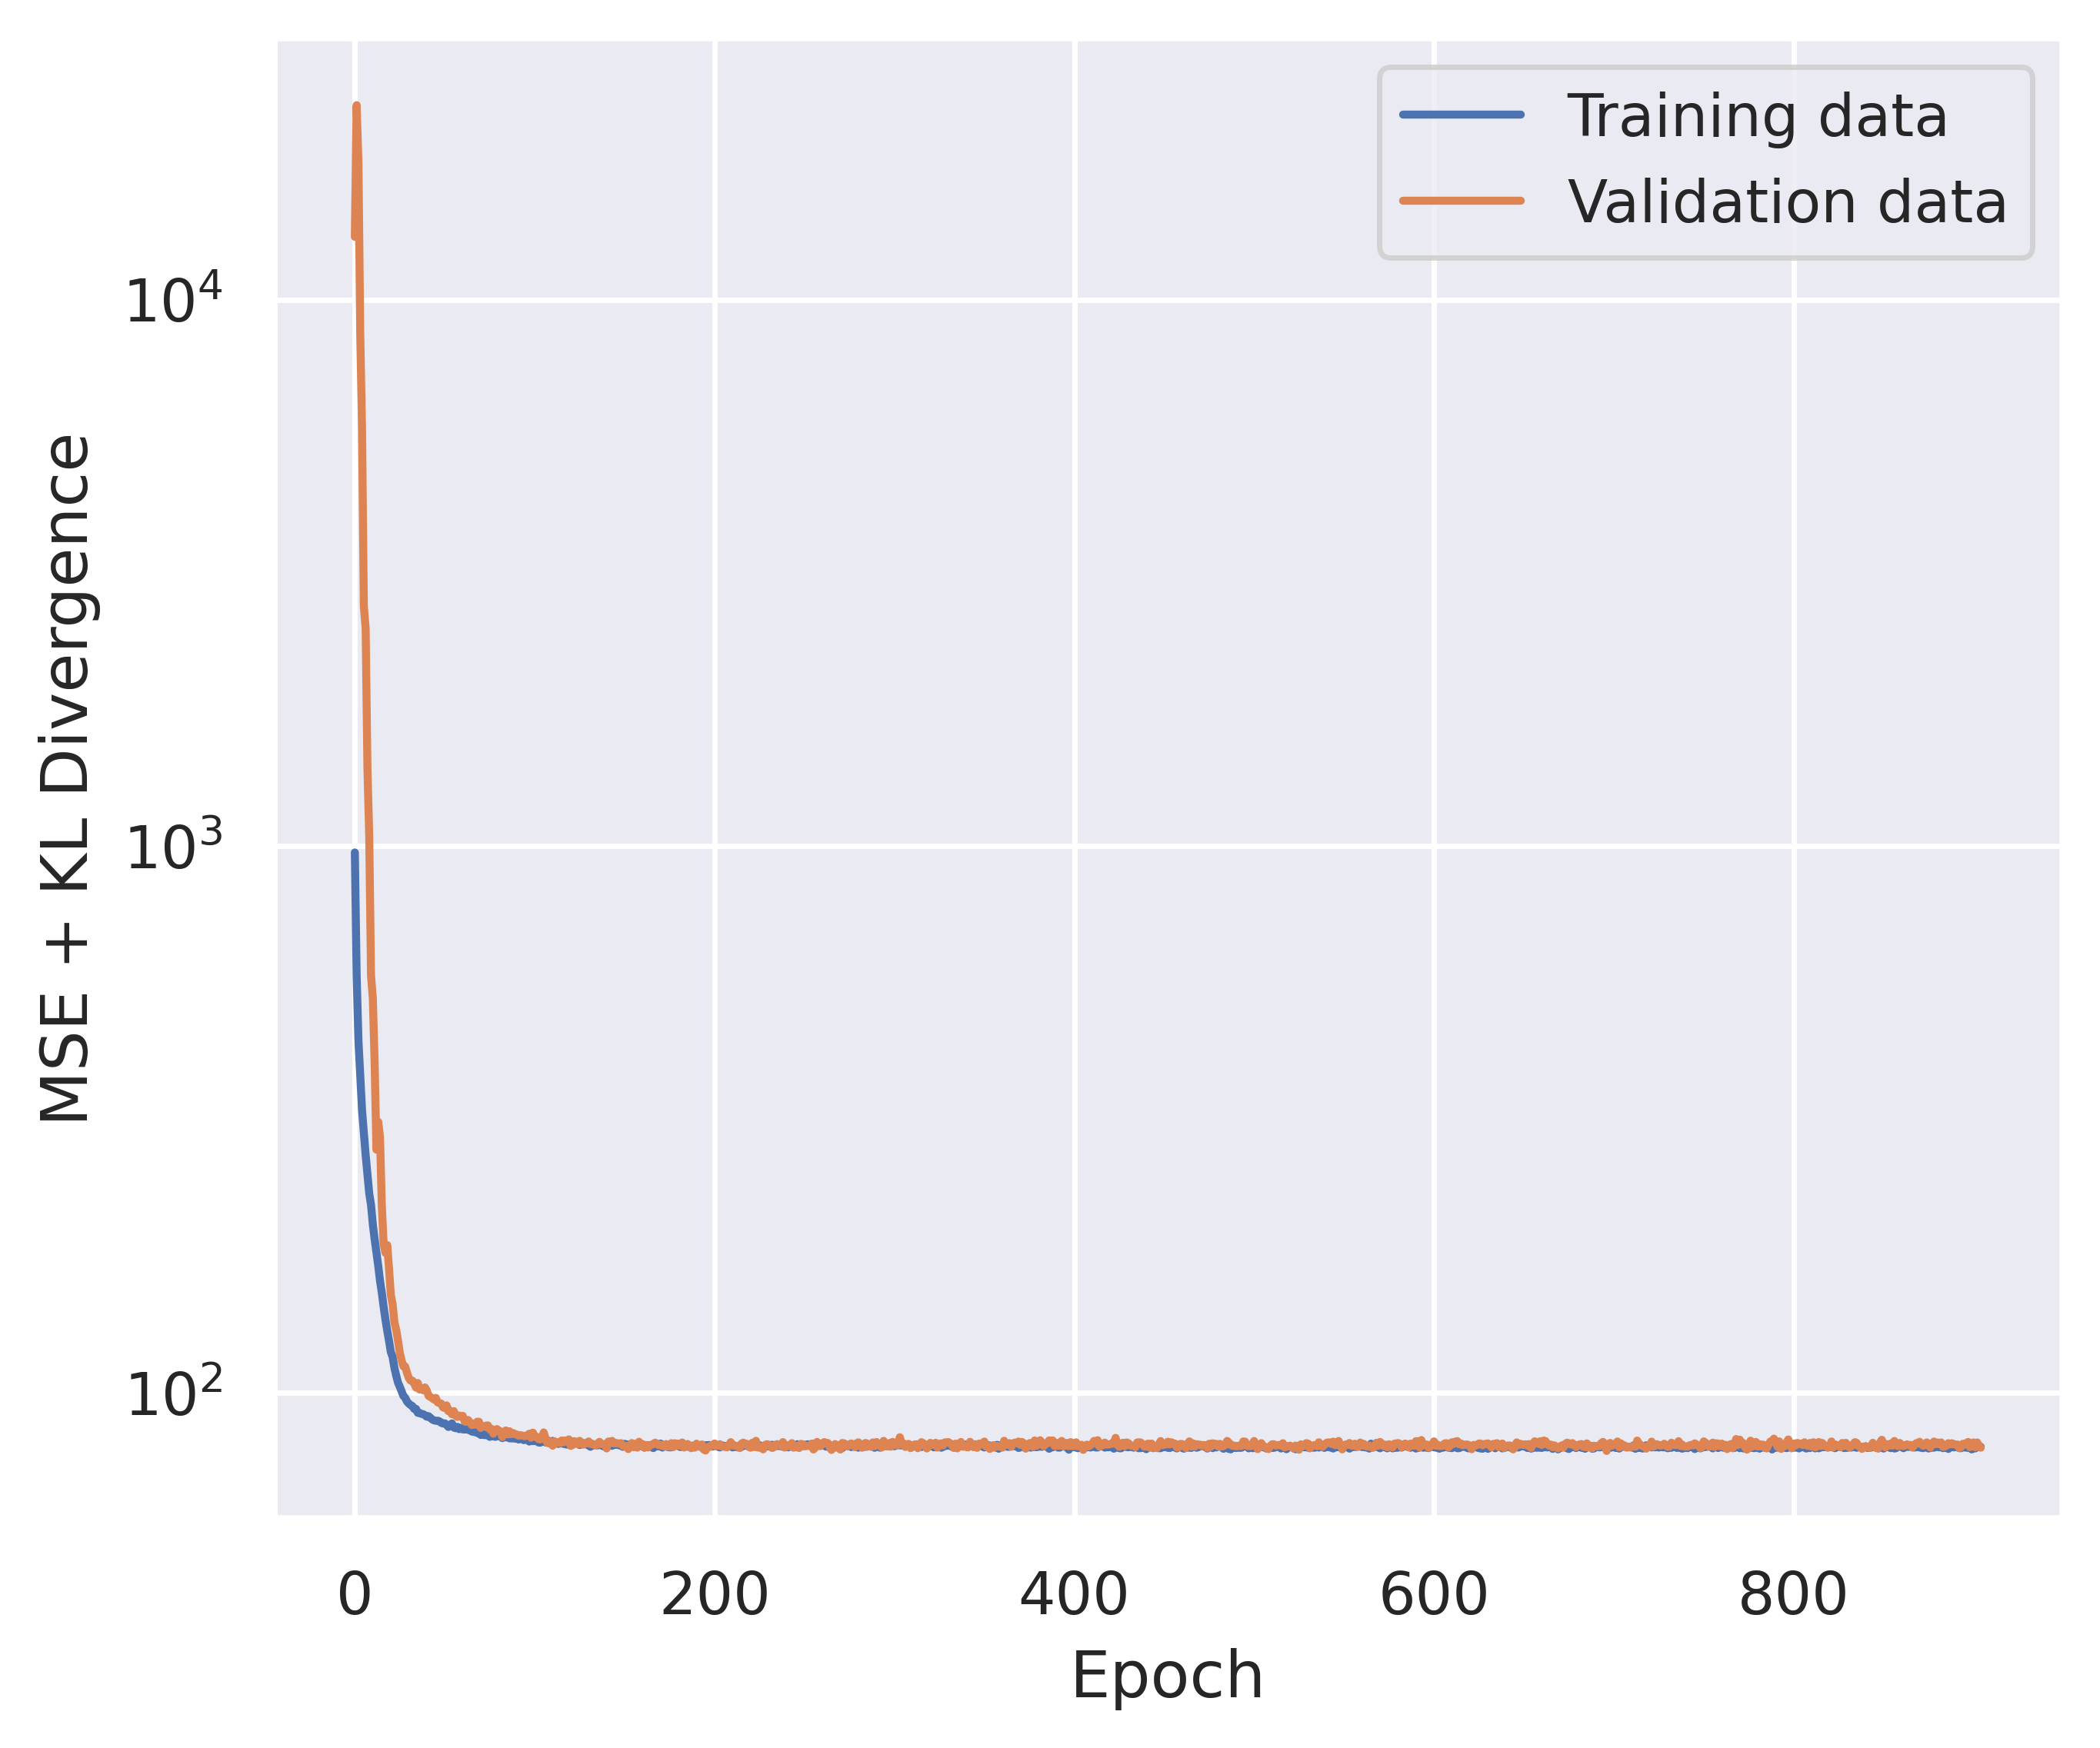

In [13]:
# plot and save the figure
save_path = pathlib.Path('../1.data-exploration/figures/training_curve.png')

plt.figure(figsize=(6, 5), dpi = 500)
plt.plot(history_df["loss"], label="Training data")
plt.plot(history_df["val_loss"], label="Validation data")
plt.yscale("log")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("Epoch")
plt.legend()
plt.savefig(save_path)
plt.show()

In [57]:
trained_vae.vae
trained_vae.vae.evaluate(subset_test_df)

5/5 [==============================] - 0s 2ms/step - loss: 80.0566 - recon: 76.7775 - kl: 3.2791


[80.05658721923828, 76.77752685546875, 3.279057025909424]

In [58]:
encoder = trained_vae.encoder_block["encoder"]
decoder = trained_vae.decoder_block["decoder"]

In [59]:
data_dir = "../0.data-download/data/"
datafs = load_data(data_dir, adult_or_pediatric = "all")
dependency_df = datafs[1]
sample_df = datafs[0]

In [60]:
train_init['train_or_test'] = train_init.apply(lambda _: 'train', axis=1)
test_init['train_or_test'] = test_init.apply(lambda _: 'test', axis=1)

In [69]:
# create a data frame of both test and train gene dependency data sorted by top 1000 highest gene variances
concat_frames = [train_init, test_init]
train_and_test = pd.concat(concat_frames).reset_index(drop=True)
train_and_test[["age_category", "sex"]] = train_and_test.age_and_sex.str.split(pat='_',expand=True)
train_and_test_subbed = train_and_test.filter(gene_list, axis = 1)
metadata_holder = []
metadata_holder = pd.DataFrame(metadata_holder)
metadata = metadata_holder.assign(
    DepMap_ID = train_and_test.DepMap_ID.astype(str), 
    age_category = train_and_test.age_category.astype(str), 
    sex = train_and_test.sex.astype(str), 
    train_or_test = train_and_test.train_or_test.astype(str)
    )
metadata

,DepMap_ID,age_category,sex,train_or_test
0,ACH-000822,Adult,Male,train
1,ACH-000054,Adult,Male,train
2,ACH-000115,Adult,Male,train
3,ACH-001433,Pediatric,nan,train
4,ACH-001375,Adult,Male,train
...,...,...,...,...
879,ACH-000496,Adult,Male,test
880,ACH-001625,Adult,Male,test
881,ACH-000622,Pediatric,Male,test
882,ACH-002280,Pediatric,Male,test


In [70]:
latent_complete = np.array(encoder.predict(train_and_test_subbed)[2])
latent_df = pd.DataFrame(latent_complete)
latent_df_dir = pathlib.Path('./results/latent_df.csv')
latent_df.to_csv(latent_df_dir)

28/28 [==============================] - 0s 1ms/step


In [71]:
latent_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.653794,0.418570,1.500483,1.042067,1.490200,-0.112990,0.443071,0.674089,0.907060,-0.024217,...,-0.233818,1.832101,-1.601556,-0.238787,0.009442,-0.608817,-1.012610,0.504424,1.594117,0.035940
1,0.051026,0.519300,-0.292433,-1.937580,1.085715,-3.441144,-0.277762,-0.761717,-2.322924,-1.734952,...,0.287005,0.234812,1.362456,1.210038,2.105558,0.849556,0.931208,-0.180785,-0.347203,0.016367
2,0.213311,1.373258,-0.753481,0.139491,0.597785,-1.174743,-0.861968,-0.615883,0.465870,1.513292,...,1.147659,0.271935,1.400034,-0.224980,0.450801,0.786978,0.982438,0.545580,0.438638,0.337566
3,1.626462,0.637349,1.372365,-0.085921,0.361885,-0.134392,-1.205411,-1.047178,1.186669,0.210258,...,-0.311481,-1.021042,-0.944451,0.215784,0.919753,0.423308,0.900595,0.063953,0.182705,0.324487
4,-0.073989,-0.461532,-0.575225,-0.087402,-0.057451,0.763124,0.034751,0.588591,-0.366858,-1.708697,...,0.308058,-1.035944,-0.228963,-0.593064,2.429490,1.571672,0.740001,0.260272,-0.048413,0.730588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,-0.162833,0.403921,0.786887,-0.086834,-0.189141,0.581975,-0.482971,1.037637,1.027226,-1.419887,...,-0.255624,0.882068,0.077031,1.304301,0.395603,0.525787,-0.966856,0.053069,1.459669,-1.725423
880,-1.339009,-1.457621,0.737467,1.035210,0.993590,0.397520,-0.104098,0.343672,0.713488,0.666167,...,0.113905,-0.082846,-0.006460,-0.153628,0.840069,-0.810374,-0.199419,1.457573,1.893754,0.618050
881,-0.859992,0.048257,-1.112345,-0.399888,-1.164627,0.756554,0.810717,-0.263710,0.563933,1.194487,...,1.707938,-0.873850,0.230235,0.451258,-0.443181,0.546697,0.354489,1.449137,0.802691,1.173757
882,-0.642273,-1.589379,-0.673344,-1.113196,0.318693,2.138674,0.483381,-0.463010,-1.084095,0.110386,...,-0.567780,0.487796,0.762887,0.691729,0.625263,-0.142855,-1.057372,-0.550654,-1.708512,-0.454360


In [72]:
age_category = metadata.pop("age_category")
sex = metadata.pop("sex")
train_test = metadata.pop("train_or_test")

/home/rosedoss/anaconda3/envs/gene_dependency_representations/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


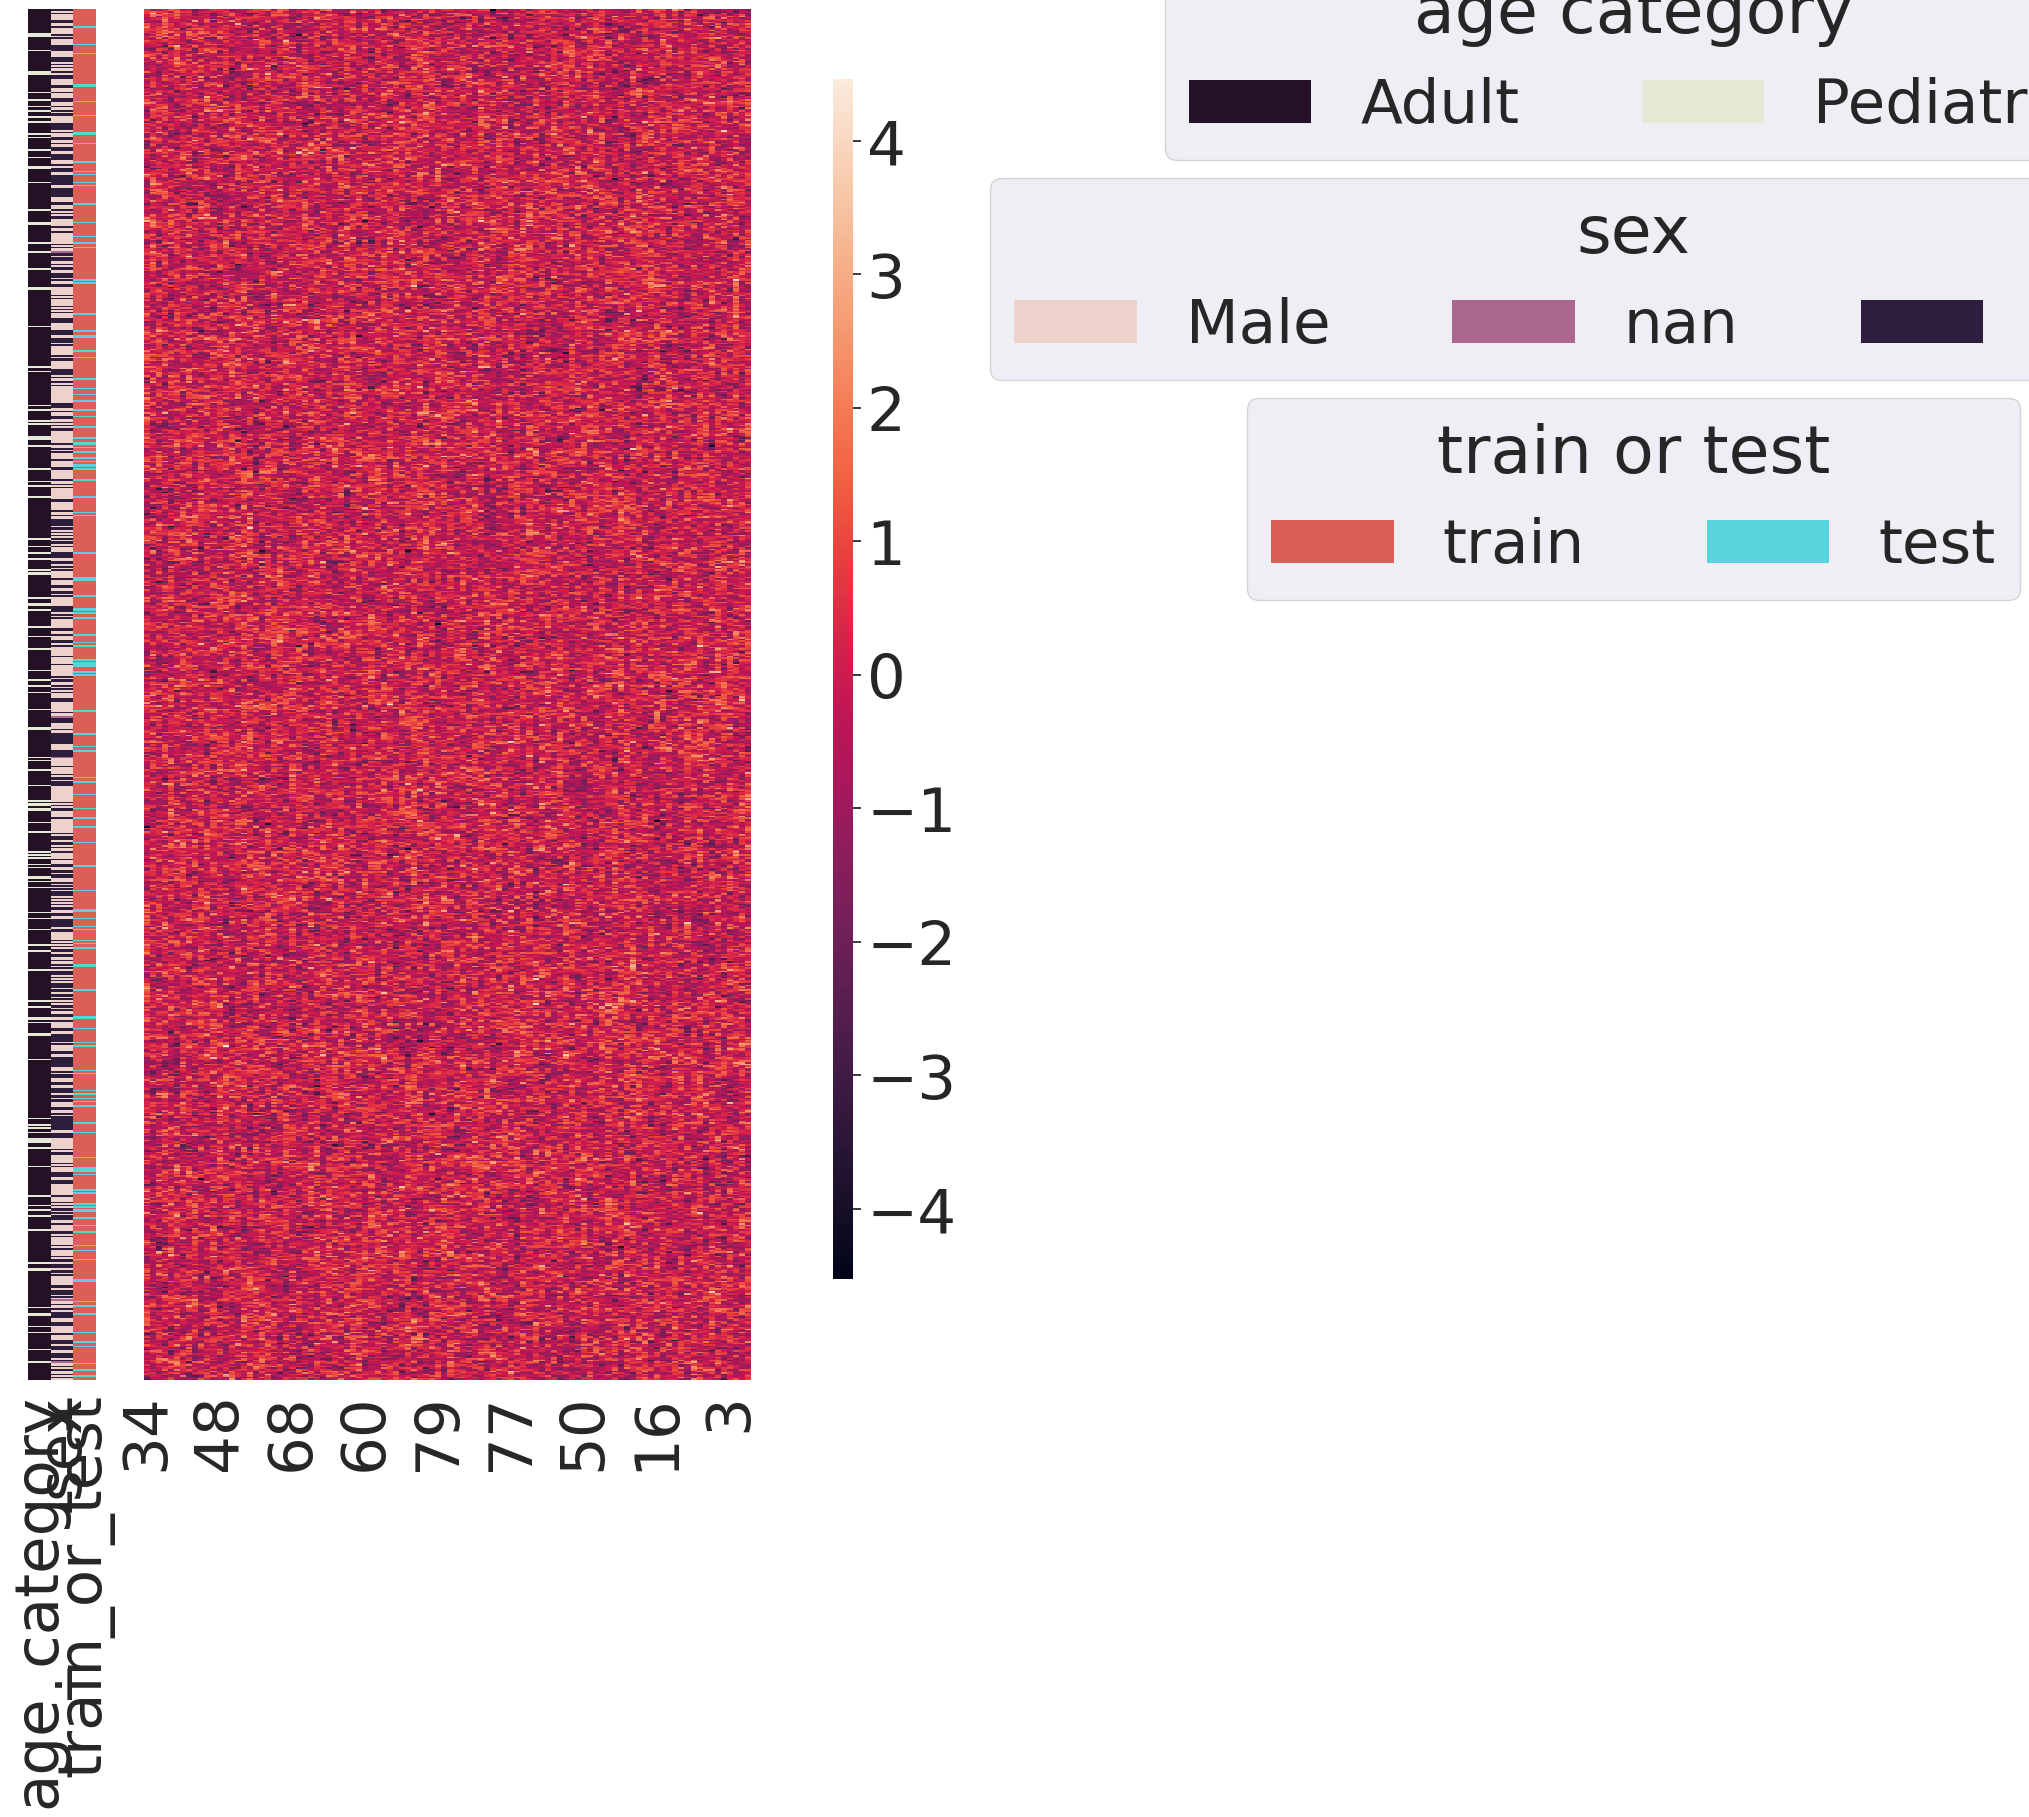

In [73]:

# display clustered heatmap of coefficients
lut_pal = sns.cubehelix_palette(age_category.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
put_pal = sns.cubehelix_palette(sex.unique().size)
mut_pal = sns.color_palette("hls", train_test.unique().size)

lut = dict(zip(age_category.unique(), lut_pal))
put = dict(zip(sex.unique(), put_pal))
mut = dict(zip(train_test.unique(), mut_pal))

row_colors1 = age_category.map(lut)
row_colors2 = sex.map(put)
row_colors3 = train_test.map(mut)

network_node_colors = pd.DataFrame(row_colors1).join(pd.DataFrame(row_colors2).join(pd.DataFrame(row_colors3)))

sns.set(font_scale=4.0)
g = sns.clustermap(latent_df, method='ward', figsize=(10, 20), row_colors= network_node_colors, yticklabels=False, dendrogram_ratio=(.1,.04), cbar_pos=(1,.3, 0.02, .6))
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)


xx = []
for label in age_category.unique():
    x = g.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
    xx.append(x)
# add the legend
legend3 = plt.legend(xx, age_category.unique(), loc="center", title='age category', ncol=2, bbox_to_anchor=(1.8, .91), bbox_transform=gcf().transFigure)


yy = []
for label in sex.unique():
    y = g.ax_row_dendrogram.bar(0, 0, color=put[label], label=label, linewidth=0)
    yy.append(y)  
# add the second legend
legend4 = plt.legend(yy, sex.unique(), loc="center", title='sex', ncol=3, bbox_to_anchor=(1.8, .8), bbox_transform=gcf().transFigure)
plt.gca().add_artist(legend3)


zz = []
for label in train_test.unique():
    z = g.ax_row_dendrogram.bar(0, 0, color=mut[label], label=label, linewidth=0)
    zz.append(z)
# add the third legend
legend5 = plt.legend(zz, train_test.unique(), loc="center", title='train or test', ncol=2, bbox_to_anchor=(1.8, .69), bbox_transform=gcf().transFigure)
plt.gca().add_artist(legend4)


# save the figure
heat_save_path = pathlib.Path('../1.data-exploration/figures/heatmap.png')
plt.savefig(heat_save_path, bbox_inches = 'tight', dpi=600)
